In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras import layers
from keras import models

In [2]:
#dataset loader
_path = "D:/amrita/sem3/introduction to AI and ML/datasets/dataset_fingerprint/numpy_dataset/"
x_real = np.load(rf"{_path}/xReal.npz")['arr_0']
y_real = np.load(rf"{_path}/yReal.npy")
x_hard = np.load(rf"{_path}/xHard.npz")['arr_0']
y_hard = np.load(rf"{_path}/yHard.npy")

print(x_real.shape, y_real.shape)

(6000, 90, 90, 1) (6000, 4)


In [3]:
x1 = layers.Input(shape=(90, 90, 1))
x2 = layers.Input(shape=(90, 90, 1))

# share weights both inputs
inputs = layers.Input(shape=(90, 90, 1))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = models.Model(inputs=inputs, outputs=feature)

In [4]:
feature_model.save('featureModel.h5')

In [32]:
flat_embed = feature_model.predict(x_real).reshape(6000, -1)
np.savez(r"D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\xRealEmbedded.npz", flat_embed)

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


In [8]:
def show(idx):
    plt.figure(figsize=(2, 2))
    plt.title('image: %s' %y_real[idx])
    plt.imshow(x_real[idx], cmap='gray')

In [9]:
def showMatch(inputImg, inputLabel, idx, percent):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Input image: %s' %inputLabel)
    plt.imshow(inputImg.squeeze(), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('                    Matched Image: %.02f, %s' % (percent, y_real[idx]))
    plt.imshow(x_real[idx].squeeze(), cmap='gray')

In [27]:
randomIdx = random.randint(1, len(x_hard))
random_img = x_hard[randomIdx].reshape((1, 90, 90, 1)).astype(np.float32) / 255.
random_label = y_hard[randomIdx]

input_embed = feature_model.predict(random_img)
input_flat_embed = input_embed.flatten()
input_flat_embed.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


(15488,)

In [24]:
import cv2
img_path = r"D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\sample_inputs\1-Ashwin_Right_Thumb_1.jpg"
inpImg = np.empty((1, 90, 90, 1), dtype=np.uint8)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (90, 90))
img = np.expand_dims(img, axis=-1)
inpImg = img
inpImg = inpImg.reshape((1, 90, 90, 1)).astype(np.float32) / 255.

input_embed = feature_model.predict(inpImg)
inpImg_flat_embed = input_embed.flatten()
inpImg_flat_embed.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(15488,)

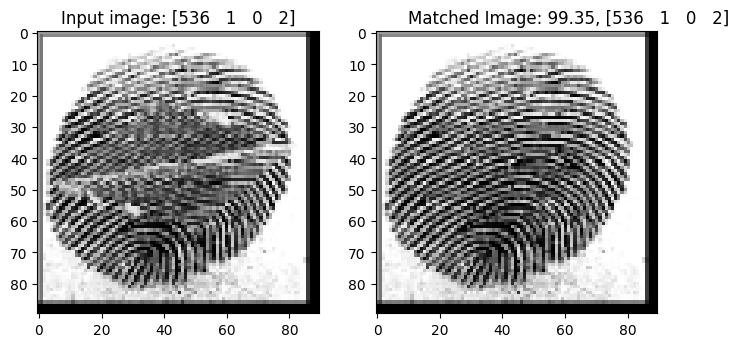

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(input_flat_embed.reshape(1, -1), flat_embed)
max_sim_index = np.argmax(similarity_scores)
max_sim_score = similarity_scores[0, max_sim_index]
percent = ((max_sim_score+1)/2) * 100
if percent <= 99.2: print('match is not accurate. Fingerprint may not be present in the database')
showMatch(random_img, random_label, max_sim_index, percent)